# Telecom Customer Churn Analysis

# Step 1- Prep the data in order to be ready to be fed to a model. 

# Load the dataset

Importing necessary libraries for data analysis and visualization, and setting up the environment

pandas for data manipulation and analysis
numpy for numerical operations
matplotlib for creating plots and visualizations
seaborn for enhancing the visual appeal of plots
sweetviz for exploratory data analysis (EDA) reports
Import the RandomForestClassifier from scikit-learn's ensemble module.
train_test_split from scikit-learn for data splitting

With these libraries, we can load, preprocess, explore, and split our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
from scipy.stats import randint



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set Pandas display option to show all columns when printing DataFrames

In [2]:
pd.set_option('display.max_columns', None)

Load the Dataset - Read the Telco Customer Churn dataset from a CSV file and store it in a DataFrame

In [3]:
df = pd.read_csv('telco-customer-churn.csv', skipinitialspace = True)


**Project Notes**:
When checking the dataset manually, we found that some column names have blank spaces/values, which could cause issues in data analysis. To handle this, we used the skipinitialspace parameter in the pd.read_csv() function provided by Pandas.

The skipinitialspace parameter allows us to control how spaces at the beginning of column names are handled when reading a CSV file. 

By setting it to True, we ensured that any spaces in column values were automatically removed during the reading process. This is particularly useful for our churn dataset, as it helps in standardizing and cleaning the values, making them easier to work with during our data analysis.

# View the dataframe

Display the first 2 rows of the DataFrame 'df'

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Dispaly information about the data types of each column in the DataFrame
Knowing these data types is crucial for data preprocessing, analysis, and visualization

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Identifying and Handling missing values

### Check for missing, null, and NaN values

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


**Project Notes**: Checking for missing values is an important step in data preprocessing to understand data quality. It Checks for missing values and sum them up. This helps identify the number of null values in each column. Before using 'skipinitialspace = True,' we couldn't find any of these missing values (empty/blank spaces). But after using it, we could spot the places where value was missing.

### Fill NaN values in column with the mean of the column

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
print("DataFrame with NaN values in column TotalCharges filled using mean:")
print(df)

DataFrame with NaN values in column TotalCharges filled using mean:
      customerID  gender  SeniorCitizen Partner Dependents  tenure   
0     7590-VHVEG  Female              0     Yes         No       1  \
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity   
0              No  No

**Project Notes:** Here we are filling NaN (null or missing) values in the 'TotalCharges' column of a DataFrame with the mean (average) value of that column. This is a common technique for handling missing data in data analysis

### Check for missing values again after replacing missing values with mean

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check for duplicates

In [9]:
duplicates = df.duplicated()
x = 0
for i in duplicates:
    if i == True:
        x += 1
print('Duplicates count:', x)

Duplicates count: 0


# Skewness Analysis

### Calculate skewness and specify numeric_only=True to calculate only for numeric columns

In [10]:
skew_values = df.skew(axis=0, numeric_only=True)
skew_sorted = skew_values.sort_values()
print(skew_sorted)

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
SeniorCitizen     1.833633
dtype: float64


**Project Notes**: we calculated skewness to understand how the distribution of data deviates from a symmetric, bell-shaped curve. 

Here tenure has relatively balanced distribution. 
MonthlyCharges skewed to the left SeniorCitizen and TotalCharges - the data is skewed to the right. 
This shows that distribution is not symmetrical like a bell curve. It has a tendency to lean to one side or the other, indicating that certain values or groups are more common, while others are less common in your dataset. Like there are many non-senior citizens (0 values) and only a few senior citizens (1 values).

### Use data visualization to see how data is distributed and find outliers.

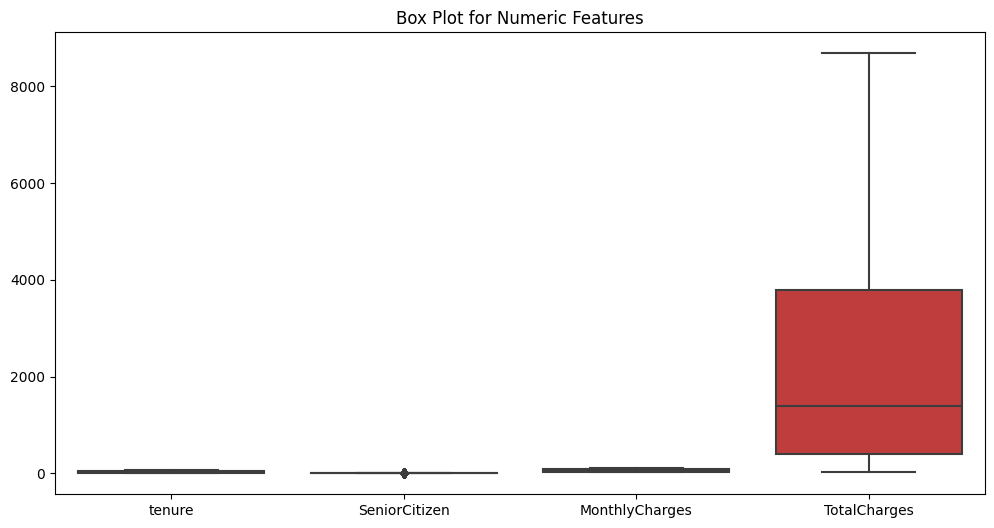

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['tenure','SeniorCitizen', 'MonthlyCharges', 'TotalCharges']])
plt.title("Box Plot for Numeric Features")
plt.show()

**Project Notes**: From the above boxplot for numeric columns, we could see some outliers in the SeniorCitizen column. To analyze it, we have used the IQR method as the data is not close to normally distributed.

# Analysis of Outliers in the Data

In a previous step, we identified an outlier in the seniorCitizen column. To address this, we're using the IQR method for detection. Given the dataset's skewness, we prefer IQR over Z-score, which is better suited for normally distributed data.

### Outliers for "TotalCharges"

In [12]:
Q1_total = df['TotalCharges'].quantile(0.25)
Q3_total = df['TotalCharges'].quantile(0.75)
IQR_total = Q3_total - Q1_total
lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total
outliers_total = df[(df['TotalCharges'] < lower_bound_total) | (df['TotalCharges'] > upper_bound_total)]
print("Outliers in TotalCharges:")
print(outliers_total)

Outliers in TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


### Outliers for "SeniorCitizen"

In [13]:
Q1_monthly = df['SeniorCitizen'].quantile(0.25)
Q3_monthly = df['SeniorCitizen'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly
lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly
outliers_monthly = df[(df['SeniorCitizen'] < lower_bound_monthly) | (df['tenure'] > upper_bound_monthly)]
print("Outliers in SeniorCitizen:")
print(outliers_monthly)

Outliers in SeniorCitizen:
      customerID  gender  SeniorCitizen Partner Dependents  tenure   
0     7590-VHVEG  Female              0     Yes         No       1  \
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity   
0              No  No phone service             DSL           

**Project Notes:** We could see all the 7032 rows as "outliers," but they are not actual outliers. They are rows with "seniorcitizen" as 1 or 0. So, this was a misinterpretation since the dataset contains only 0s and 1s. IQR works well only for numeric data. As the method didn't handle this well, we now conclude that there are no actual outliers.

### Outliers for "tenure"

In [14]:
Q1_monthly = df['tenure'].quantile(0.25)
Q3_monthly = df['tenure'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly
lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly
outliers_monthly = df[(df['tenure'] < lower_bound_monthly) | (df['tenure'] > upper_bound_monthly)]
print("Outliers in tenure:")
print(outliers_monthly)

Outliers in tenure:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


### Outliers for "MonthlyCharges"

In [15]:
Q1_monthly = df['MonthlyCharges'].quantile(0.25)
Q3_monthly = df['MonthlyCharges'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly
lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly
outliers_monthly = df[(df['MonthlyCharges'] < lower_bound_monthly) | (df['MonthlyCharges'] > upper_bound_monthly)]
print("Outliers in MonthlyCharges:")
print(outliers_monthly)

Outliers in MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


# Step 2- List all types of data, numeric, categorical, text.

# Data Transformation and Numeric Encoding

**Project Notes**:
Data transformation from categorical to numeric is important in EDA because it requires numeric inputs, making it necessary to convert categorical data for analysis and modeling.

### Display summary information about the DataFrame before numerical conversion

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### List all types of data - numeric, categorical, text.

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object', 'category'])
text_columns = df.select_dtypes(include=['object'])

print("Numeric Columns:")
print(numeric_columns.columns.tolist())
print("\nCategorical Columns:")
print(categorical_columns.columns.tolist())
print("\nText Columns:")
print(text_columns.columns.tolist())

Numeric Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Text Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Convert categorical data to numerical using Factorize function

In [18]:
'''data = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])'''
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
data = df


**Project Notes:**
The script is converting categorical features into numerical features using a technique called factorize function from pandas. 

Now, the df will have columns with values with 1s indicating the presence of the category and 0s indicating absence.

### Display summary information about the DataFrame after numerical conversion

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [20]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0


**Project Notes**:
Here we could see it is same 21 coulumns before and after conversion.

# Step 3- Perform EDA on data.

# Exploratory Data Analysis

### Generate summary statistics such as count, mean, standard deviation, minimum, and maximum values for each numeric column
This is useful for initial data exploration

In [21]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.516967,0.299588,32.371149,0.903166,1.325004,0.872923,0.720006,0.871788,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,0.738369,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


**Project Notes**:
Here we could see the statistics of numeric columns and others with categories like "yes" or "no" or "0" or "1". Among these numeric columns, "total charges" has the smallest value of 18.8, the largest value of 8684.8, and an average (mean) value of 2283.3. There is a drastic difference between the min and max values. To get a better sense of how the data is spread out, we've created some plots to visualize it.

# Data Visualization

### Display a distribution plot 

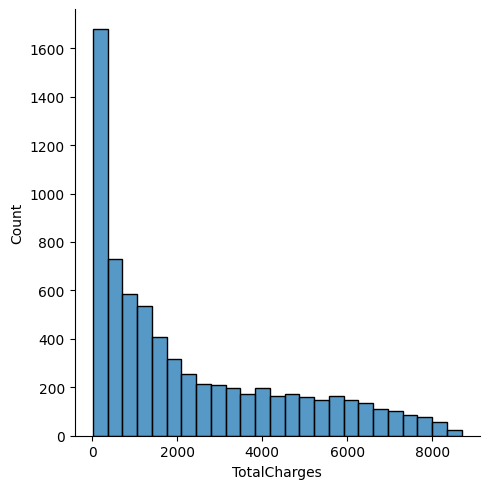

In [22]:
sns.displot(data, x="TotalCharges")

In [23]:
data[['TotalCharges','MonthlyCharges']]

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.50,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70
...,...,...
7038,1990.50,84.80
7039,7362.90,103.20
7040,346.45,29.60
7041,306.60,74.40


**Project Notes**
Created histogram for the 'TotalCharges' column to visualize the distribution of values in it.

### Display a boxplot 

<Axes: >

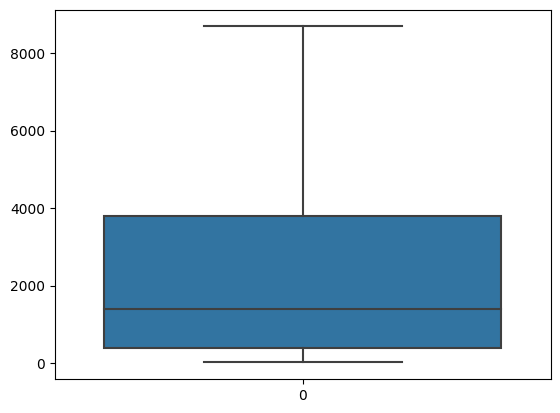

In [24]:
sns.boxplot(data = data['TotalCharges'])

<Axes: >

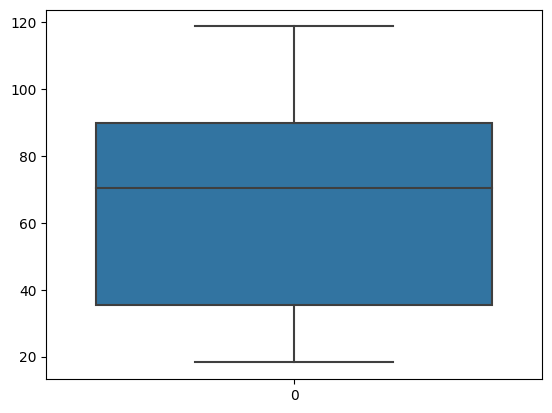

In [25]:
sns.boxplot(data = data['MonthlyCharges'])

**Project Notes**: From the above boxplot, we could see it has no outliers.

### Generate a set of histograms for each column in the DataFrame 'df' to visualize the distribution of data.

In [26]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

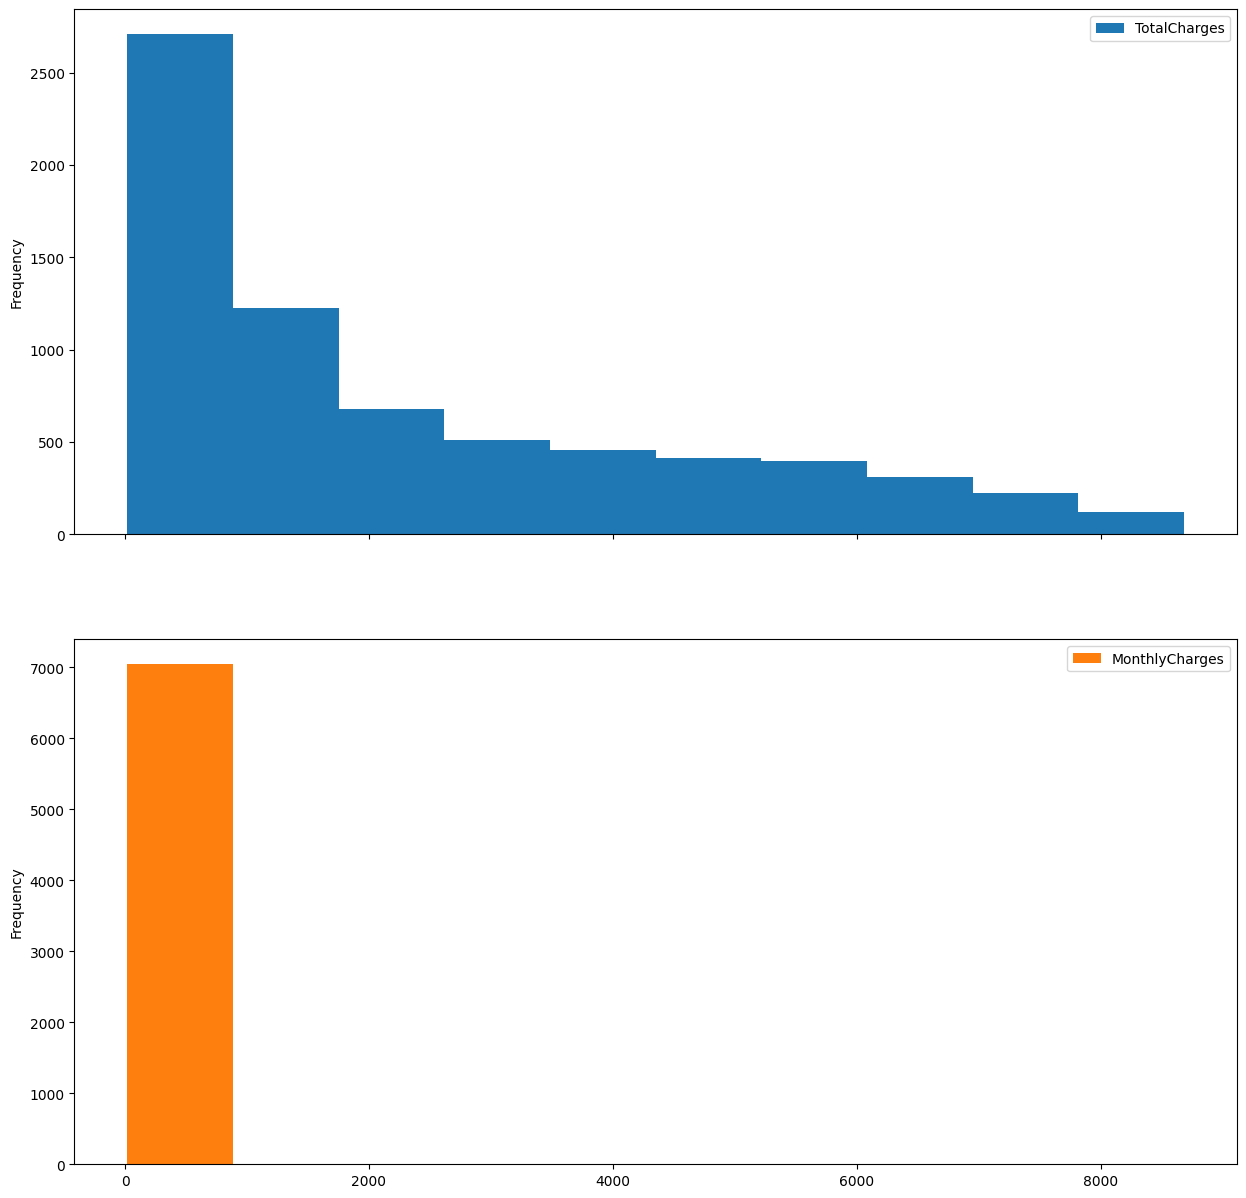

In [27]:
data[['TotalCharges','MonthlyCharges']].plot(kind='hist', legend=True, subplots=True, figsize =(15,15))

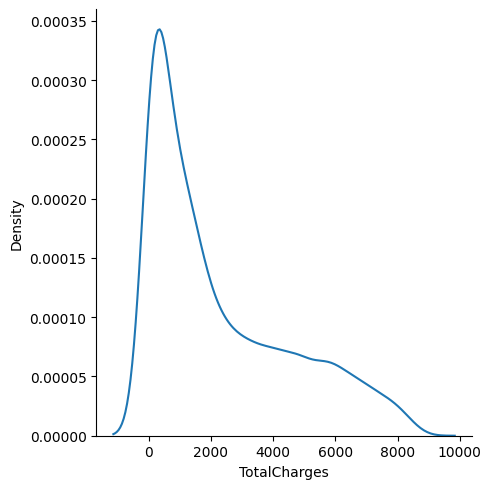

In [28]:
sns.displot(data['TotalCharges'], kind="kde")

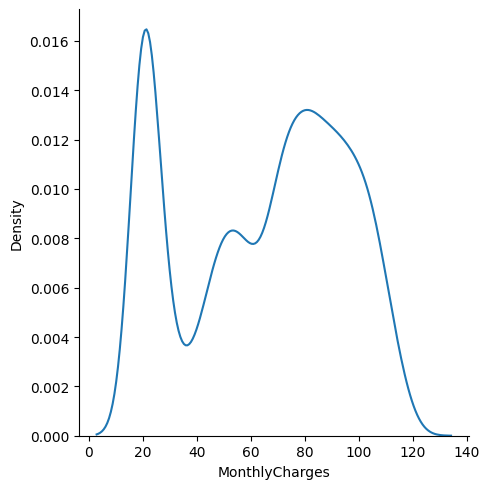

In [29]:
sns.displot(data['MonthlyCharges'], kind="kde")

# Correlation Analysis

Correlation shows us which factors are more and less influential in predicting customer churn. Positive correlations suggest that increasing the feature increases the likelihood of churn, while negative correlations suggest the opposite. Features with correlations close to 0 have little linear impact on churn.

### Calculate the correlation matrix for numeric columns in the DataFrame by specifying numeric_only=True to exclude non-numeric columns.
Print the resulting correlation matrix to examine the relationships between the numeric columns in the dataset.

In [30]:
correlation_matrix = data.corr()
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,-0.008192,0.008170,0.000189,-0.005171,0.007150,-0.027049,-0.023091,-0.007824,-0.001836,-0.003607,-0.004869,0.003892,-0.001688,-0.011087,0.003361,-0.002741,-0.013593,-0.012606,0.001818,0.010286
gender,-0.008192,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,0.008170,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.220173,0.102395,0.150889
Partner,0.000189,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.096848,-0.318812,0.150448
Dependents,-0.005171,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113890,0.064535,-0.164221
tenure,0.007150,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,-0.253743,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247900,0.824757,-0.352229
PhoneService,-0.027049,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,0.247398,0.112851,0.011942
MultipleLines,-0.023091,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.490700,0.412079,0.036310
InternetService,-0.007824,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.001836,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621227,-0.153051,-0.332819


In [31]:
correlation_matrix['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.332819
TechSupport        -0.329852
DeviceProtection   -0.281465
PaymentMethod      -0.262818
StreamingMovies    -0.207256
StreamingTV        -0.205742
TotalCharges       -0.199428
PaperlessBilling   -0.191825
Dependents         -0.164221
OnlineBackup       -0.074205
InternetService    -0.047291
gender             -0.008612
customerID          0.010286
PhoneService        0.011942
MultipleLines       0.036310
Partner             0.150448
SeniorCitizen       0.150889
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

### Get an array of column names from the DataFrame

In [32]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Create a heatmap with an actual dataset to easily analyze.

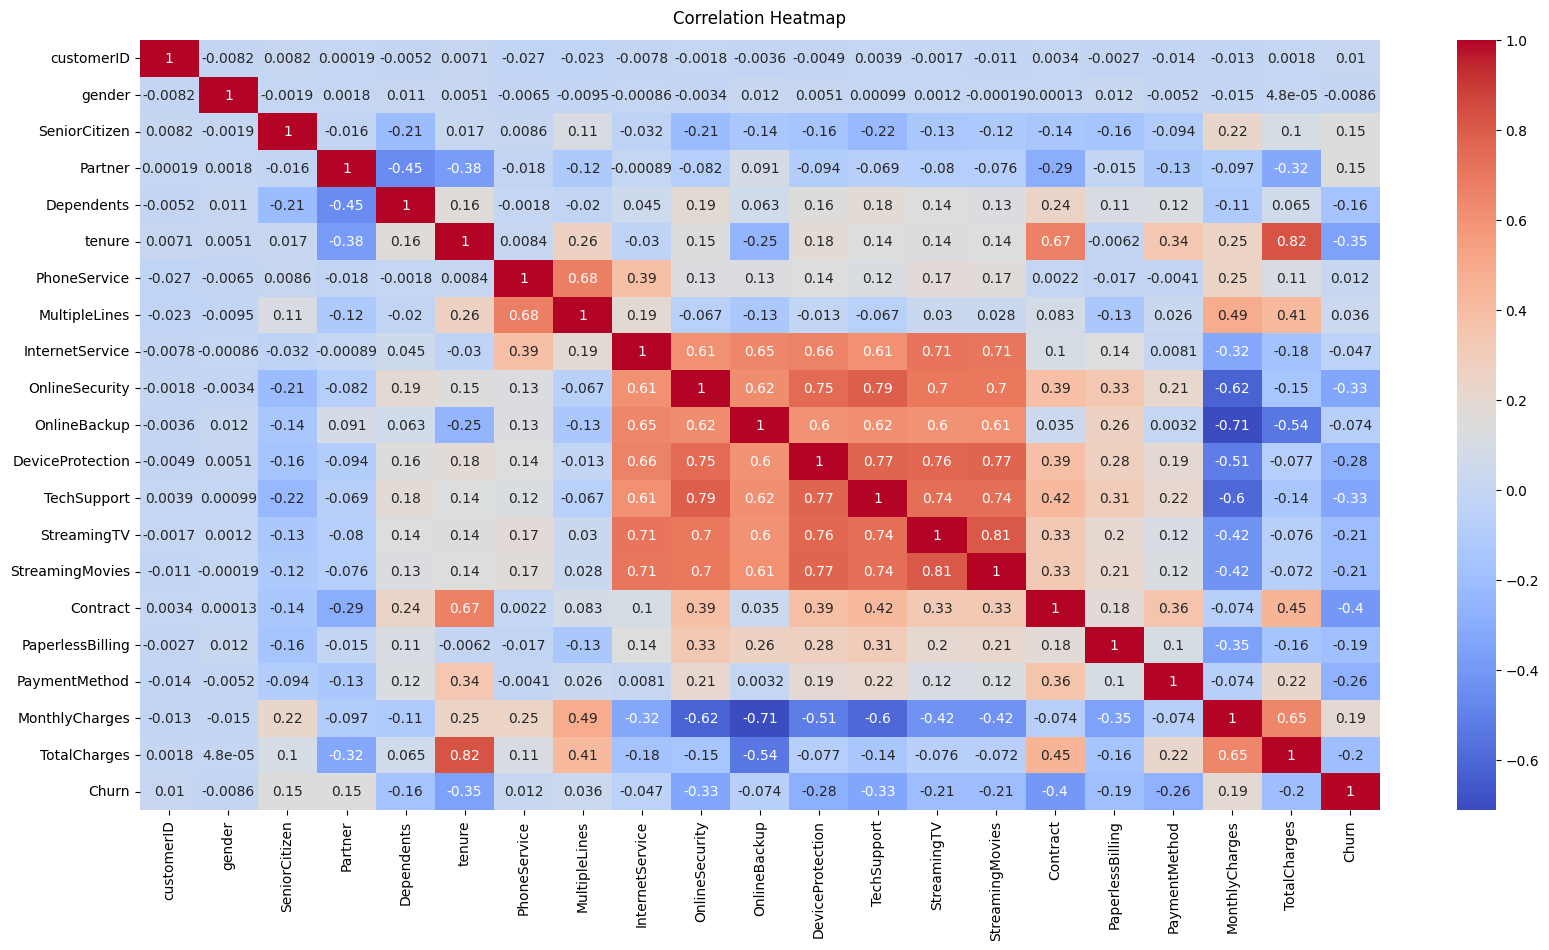

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=12, pad=12)
plt.show()

**Project Notes:**

SeniorCitizen vs. Others: 
SeniorCitizen has a weak positive correlation with MonthlyCharges and TotalCharges but is not significantly related to tenure.

Tenure vs. Others: Tenure is strongly positively correlated with TotalCharges, moderately correlated with MonthlyCharges, and weakly correlated with SeniorCitizen.

MonthlyCharges vs. Others: MonthlyCharges has a moderate positive correlation with TotalCharges and SeniorCitizen, but a weaker correlation with tenure.

TotalCharges vs. Others: TotalCharges is strongly positively correlated with tenure and moderately correlated with MonthlyCharges, but weakly correlated with SeniorCitizen.

We could see a strong positive correlation between tenure and TotalCharges suggests that as tenure increases, TotalCharges tends to increase as well.

Correlation is a valuable statistical measure that can help identify associations between variables, but is not causation.

### List correlation values between the "Churn" column and all other columns in descending order

In [34]:
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix["Churn"].sort_values(ascending=False))

Churn               1.000000
MonthlyCharges      0.193356
SeniorCitizen       0.150889
Partner             0.150448
MultipleLines       0.036310
PhoneService        0.011942
customerID          0.010286
gender             -0.008612
InternetService    -0.047291
OnlineBackup       -0.074205
Dependents         -0.164221
PaperlessBilling   -0.191825
TotalCharges       -0.199428
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


**Project Notes**:
Here, "Contract_Month-to-month" has a relatively strong positive correlation with "Churn," suggesting that customers with month-to-month contracts are more likely to churn.

The "tenure" has a relatively strong negative correlation with "Churn," indicating that longer-tenured customers are less likely to churn.

The "gender" feature (both "gender_Female" and "gender_Male") has a correlation close to 0, suggesting that gender doesn't strongly influence churn.

Here still correlation is not causation.

# Feature Importance Analysis

### Feature importance is crucial in data science EDA because it helps us figure out which data aspects are most influential in making predictions. This guides us to focus on the right variables when building models. It simplifies complex data.
We have used RandomForest method.

### Get feature importance by Random Forest

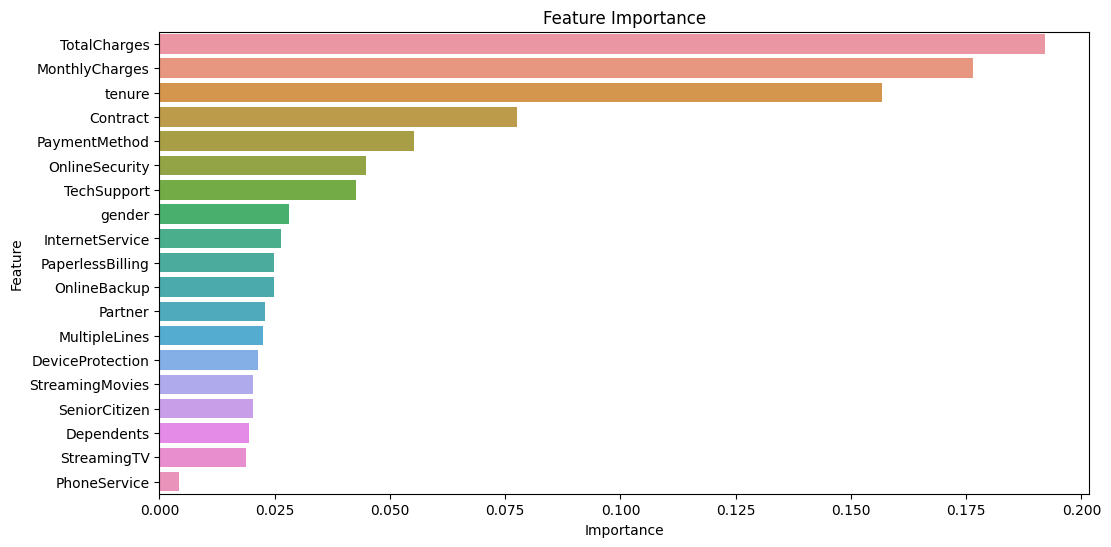

In [35]:
# Split the data into features and target
data = data.drop(['customerID'], axis=1)
X = data.drop('Churn', axis=1)  
y = data['Churn'] 

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

**Project Notes**:
Here we are trying to predict whether or not customers will churn. 
So we have to remove churn from the other features.
Then it splits the data into two parts:
'X' - features and 'y'- target.

Random Forest will learn from the features (X) and try to predict the target (y).
It calculates and shows the importance of each feature in making predictions. 

From the chart we can see first few features are more critical than others in determining if customers will churn or not.

# Step 4- Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’ command contrast the training vs test datasets on the target (‘churn’)

# Data Splitting for Model Training and Evaluation

Data splitting is important in EDA because it helps test how well our model works. By dividing the data into a training set and a test set, we can build the model on one part and check how accurate it is on the other.

In [36]:
X = data.drop('Churn', axis=1)  
y = data['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Comparing Training and Test Datasets on the Target Variable ('churn') Using SweetViz

In [37]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

report = sv.compare([train_data, 'Training Data'], [test_data, 'Test Data'], 'Churn')
report.show_html('comparison_report.html')

Feature: Churn (TARGET)                      |▍         | [  5%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Project Notes**:
Created a detailed comparison report that visually summarizes the characteristics of the training and test datasets.
We can see how well your data is split between training and testing and how "Churn" varies between these two sets. 
This was useful for our data exploration and understanding the distribution of the target variable in different datasets.

# Step 5- State limitations/issues (if any) with the given dataset.

# Dataset Limitations and Issues

In our dataset, the way the numbers are spread out doesn't look like a typical bell curve. 
So, it's not very close to being normally distributed.
In the beginning, we had trouble finding missing values in our data using the scripts. But when we looked at the data ourselves, we found empty spaces/vaues. To fix this, we used a setting called "skipinitialspace" to "True." This change helped us deal with spaces at the start of column values when we read a CSV file. By using "skipinitialspace" as "True," we made sure that any extra spaces in our value would be automatically removed when we read it. This was helpful to find missing values using the script.

----------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------

**Notes:**

# Standardizing Data using StandardScaler

The purpose of this code is to standardize the training and test datasets using the StandardScaler from the scikit-learn library. Standardization is a common preprocessing step in machine learning that transforms the data to have a mean of 0 and a standard deviation of 1. Basically to balance the dataset.  

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# 1. Logistic Regression Model Training and Prediction

Logistic Regression is a linear classification algorithm used for binary classification tasks, predicting the probability of an instance belonging to a particular class.

To use the Logistic Regression model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In [39]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

**Model performance metrics**

We then evaluated the Naive Bayes model's performance using common metrics - Accuracy, Precision, Recall and F1 Score

In [40]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Logistic Regression Model Performance:
Accuracy: 0.80
Precision: 0.65
Recall: 0.56
F1 Score: 0.60


**Classification Report for Logistic Regression:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_pred_lr) obtained from the Logistic Regression model


In [41]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



**Confusion Matrix Visualization for Logistic Regression:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred_lr) obtained from the Logistic Regression model and visualizes the confusion matrix using a heatmap.

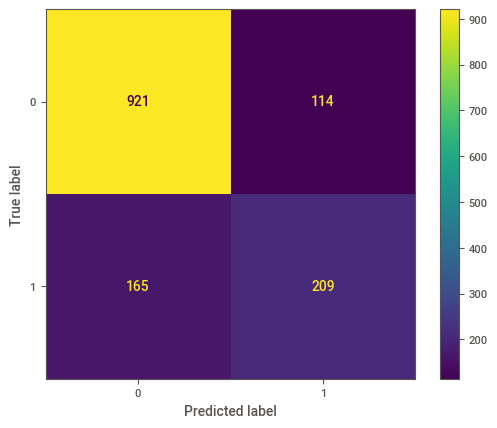

In [42]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr).plot()


**ROC and AUC for Logistic Regression:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

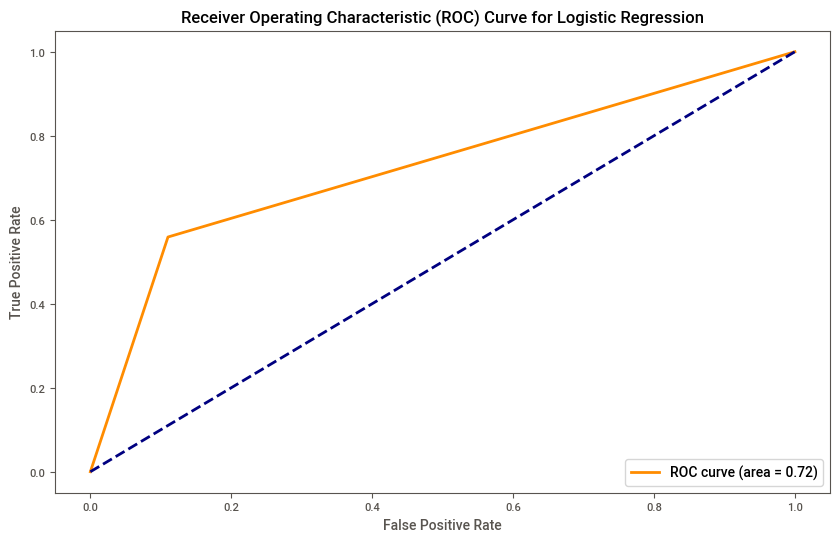

In [43]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# 2. Naive Bayes Classification Algorithm 

Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem, assuming independence between features, making it efficient for text classification and spam filtering.

To use the Naive Bayes model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

Based on different underlying probability distributions. The three most common types are:
Gaussian - continuous values, Multinomial - discrete data(doc), Bernoulli - binary variables(boolean)

We used Gaussian as some of our variables have range of values

In [44]:
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)

**Model performance metrics for Naive Bayes:**

We then evaluated the Naive Bayes model's performance using common metrics - Accuracy, Precision, Recall and F1 Score



In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Naive Bayes Model Performance:
Accuracy: 0.70
Precision: 0.47
Recall: 0.80
F1 Score: 0.59


**Classification Report for Naive Bayes:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_pred) obtained from the Naive Bayes model


In [46]:
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1035
           1       0.47      0.80      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.79      0.70      0.72      1409



**Confusion Matrix Visualization for Naive Bayes:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred) obtained from the Naive Bayes model and visualizes the confusion matrix using a heatmap.

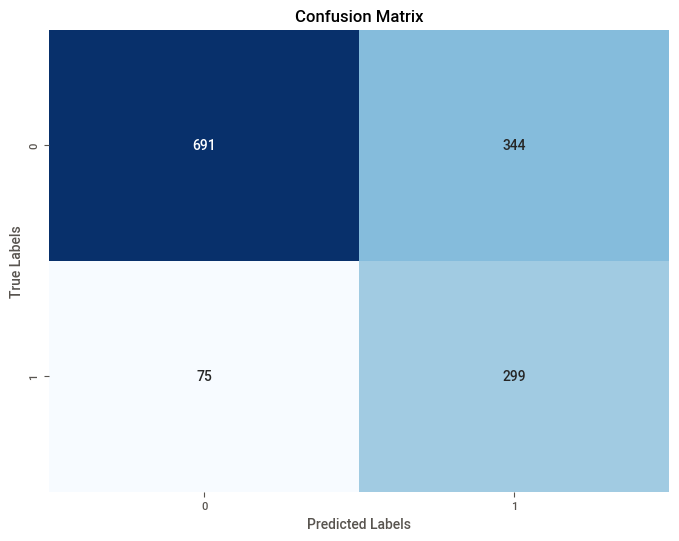

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**ROC and AUC for Naive Bayes:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

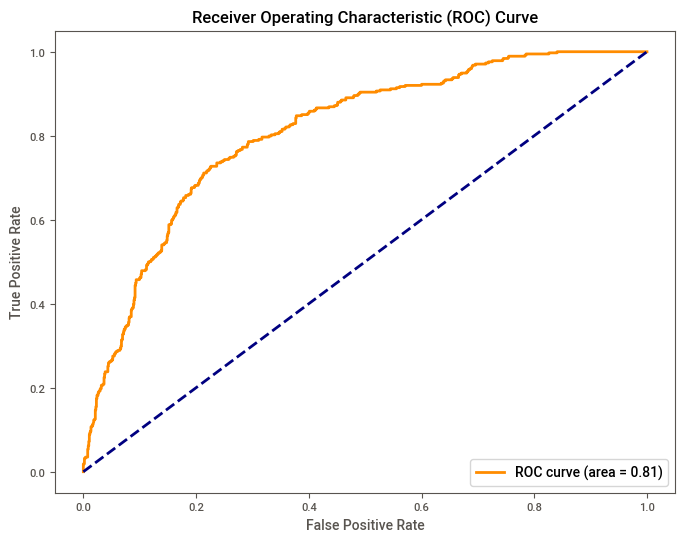

In [48]:
y_prob = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. K-Nearest Neighbors(KNN)

K-Nearest Neighbors is a simple, instance-based learning algorithm that classifies a data point based on the majority class of its k nearest neighbors in the feature space.

To use the K-Nearest Neighbors model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In [49]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_kpred=knn.predict(X_test)

**Model performance metrics for K-Nearest Neighbors:**

We then evaluated the K-Nearest Neighbors model's performance using common metrics - Accuracy, Precision, Recall and F1 Score


In [50]:
accuracy = accuracy_score(y_test, y_kpred)
precision = precision_score(y_test, y_kpred)
recall = recall_score(y_test, y_kpred)
f1 = f1_score(y_test, y_kpred)

print("KNN Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

KNN Model Performance:
Accuracy: 0.75
Precision: 0.53
Recall: 0.51
F1 Score: 0.52


**Classification Report for K-Nearest Neighbors:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_kpred) obtained from the K-Nearest Neighbors model


In [51]:
print("Classification Report for K Nearest Neighbors:")
print(classification_report(y_test, y_kpred))

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1035
           1       0.53      0.51      0.52       374

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.75      0.75      1409



**Confusion Matrix Visualization for K-Nearest Neighbors:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_kpred) obtained from the K-Nearest Neighbors model and visualizes the confusion matrix using a heatmap.

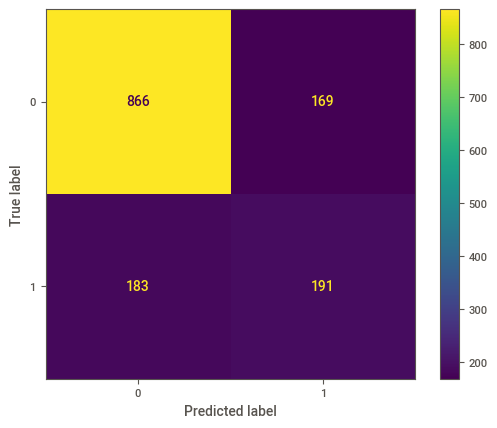

In [52]:
conf_matrix_knn = confusion_matrix(y_test, y_kpred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn).plot()

**ROC and AUC for K-Nearest Neighbors:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

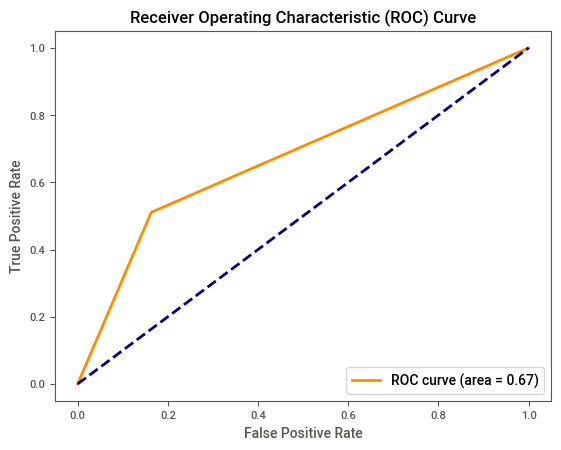

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_kpred)
roc_auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Rerunning KNN by tuning hyperparameter Number of Neighbour

To use the K-Nearest Neighbors model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In k-Nearest Neighbors (KNN), the hyperparameter "k" represents the number of nearest neighbors to consider when making a prediction for a new data point. Tuning the value of "k" is an essential step in optimizing the performance of a KNN model.

In [54]:
knn_tuned=KNeighborsClassifier(n_neighbors=9)
knn_tuned.fit(X_train,y_train)
y_kpred_tuned=knn_tuned.predict(X_test)

We started with "k" values ranging from 3, and through experimentation found that a "k" value of 9 yielded the highest accuracy, and after that it didnt change. So we have tuned the "k" hyperparameter with 9 for our KNN model


**Model performance metrics for K-Nearest Neighbors with tuned hyperparameters:**

We then evaluated the K-Nearest Neighbors model's performance using common metrics - Accuracy, Precision, Recall and F1 Score


In [55]:
accuracy_tuned = accuracy_score(y_test, y_kpred_tuned)
precision_tuned = precision_score(y_test, y_kpred_tuned)
recall_tuned = recall_score(y_test, y_kpred_tuned)
f1_tuned = f1_score(y_test, y_kpred_tuned)

print("KNN Model Performance:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")

KNN Model Performance:
Accuracy: 0.78
Precision: 0.58
Recall: 0.54
F1 Score: 0.56


**Classification Report for K-Nearest Neighbors with tuned hyperparameters:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_kpred_tuned) obtained from the K-Nearest Neighbors model


In [56]:
print("Classification Report for Tuned K Nearest Neighbors:")
print(classification_report(y_test, y_kpred_tuned))

Classification Report for Tuned K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.54      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



**Confusion Matrix Visualization for K-Nearest Neighbors with tuned hyperparameters:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_kpred_tuned) obtained from the K-Nearest Neighbors model and visualizes the confusion matrix using a heatmap.

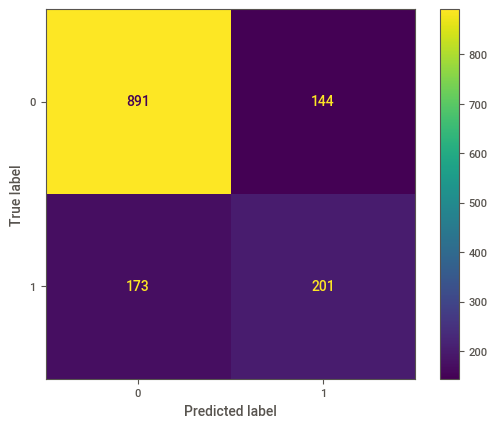

In [57]:
conf_matrix_knn_tuned = confusion_matrix(y_test, y_kpred_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot()

**ROC and AUC for K-Nearest Neighbors with tuned hyperparameters:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

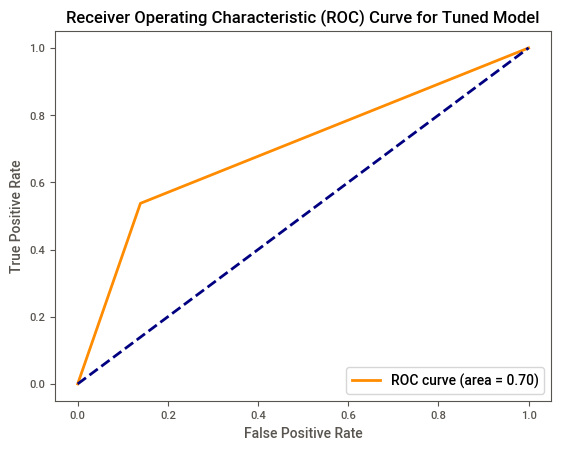

In [58]:
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_kpred_tuned)
roc_auc_tuned_knn = auc(fpr_tuned, tpr_tuned)

plt.figure()
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tuned_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned Model')
plt.legend(loc="lower right")
plt.show()

# 4. Decision Tree 

Decision Tree is a tree-like model where each node represents a feature, and branches represent feature outcomes, used for both classification and regression tasks by recursively partitioning the data. The depth of the tree influences the complexity of the rules learned.

To use the Decision Tree model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In [59]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict=dt.predict(X_test)

**Model performance metrics for Decision Tree:**

We then evaluated the Decision Tree model's performance using common metrics - Accuracy, Precision, Recall and F1 Score



In [60]:
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_precision = precision_score(y_test, dt_predict)
dt_recall = recall_score(y_test, dt_predict)
dt_f1 = f1_score(y_test, dt_predict)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")


Decision Tree Classifier Metrics:
Accuracy: 0.72
Precision: 0.47
Recall: 0.50
F1 Score: 0.49


**Classification Report for Decision Tree:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (dt_predict) obtained from the Decision Tree model


In [61]:
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predict))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.47      0.50      0.49       374

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



**Confusion Matrix Visualization for Decision Tree:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (dt_predict) obtained from the Decision Tree model and visualizes the confusion matrix using a heatmap.

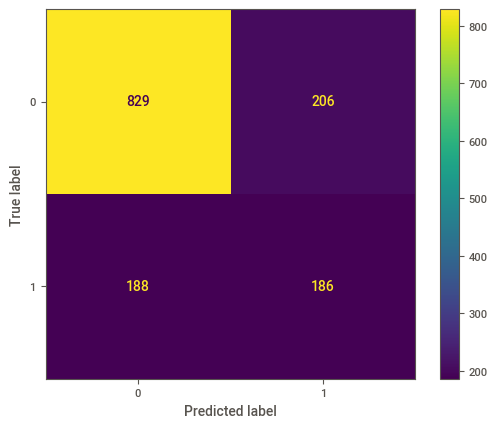

In [62]:
dt_confusion_matrix=confusion_matrix(y_test,dt_predict)
ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix).plot()


**ROC and AUC for Decision Tree:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

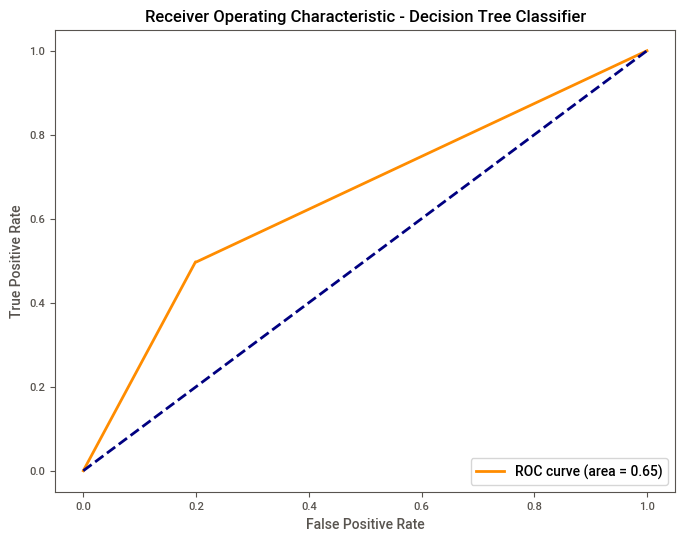

In [63]:
dt_probs = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Rerunning Decision Tree by tuning hyperparameters.

To use the Decision Tree model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In scikit-learn, the DecisionTreeClassifier has two main criteria for making decisions at each node: 'gini' and 'entropy'.
The 'gini' criterion measures the impurity of a set of data points. It aims to minimize the probability of misclassification. A node with a lower Gini impurity is preferred.
The 'entropy' criterion, also known as information gain, measures the amount of information or disorder in a set of data points. It aims to maximize the information gain at each node.
So we used entropy.

In [64]:
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_tuned.fit(X_train,y_train)
dt_predict_tuned=dt_tuned.predict(X_test)

**Model performance metrics for Decision Tree with tuned hyperparameters:**

We then evaluated the Decision Tree model's performance using common metrics - Accuracy, Precision, Recall and F1 Score



In [65]:
dt_accuracy_tuned = accuracy_score(y_test, dt_predict_tuned)
dt_precision_tuned = precision_score(y_test, dt_predict_tuned)
dt_recall_tuned = recall_score(y_test, dt_predict_tuned)
dt_f1_tuned = f1_score(y_test, dt_predict_tuned)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {dt_accuracy_tuned:.2f}")
print(f"Precision: {dt_precision_tuned:.2f}")
print(f"Recall: {dt_recall_tuned:.2f}")
print(f"F1 Score: {dt_f1_tuned:.2f}")


Decision Tree Classifier Metrics:
Accuracy: 0.79
Precision: 0.61
Recall: 0.55
F1 Score: 0.58


**Classification Report for Decision Tree with tuned hyperparameters:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (dt_predict_tuned) obtained from the Decision Tree model


In [66]:
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predict_tuned))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



**Confusion Matrix Visualization for Decision Tree with tuned hyperparameters:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (dt_predict_tuned) obtained from the Decision Tree model and visualizes the confusion matrix using a heatmap.

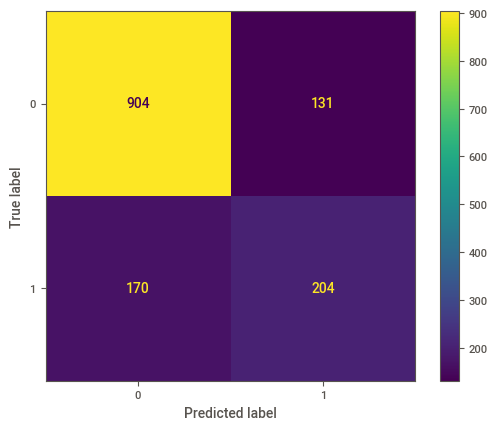

In [67]:
dt_confusion_matrix_tuned=confusion_matrix(y_test,dt_predict_tuned)
ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix_tuned).plot()

**ROC and AUC for Decision Tree with tuned hyperparameters:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

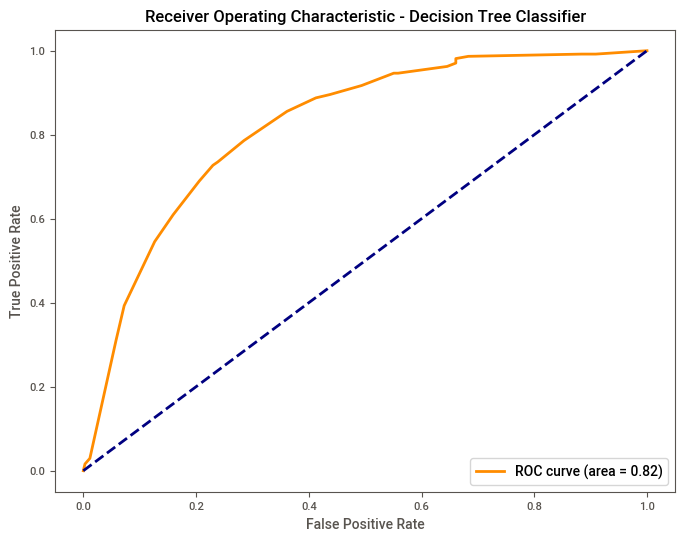

In [68]:
dt_probs_tuned = dt_tuned.predict_proba(X_test)[:, 1]
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, dt_probs_tuned)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt_tuned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# 5. Random Forest 

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks, providing improved accuracy and robustness.

To use the Random Forest model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In [69]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

**Model performance metrics for Random Forest:**

We then evaluated the Random Forest model's performance using common metrics - Accuracy, Precision, Recall and F1 Score


In [70]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Random Forest Model Performance:
Accuracy: 0.79
Precision: 0.62
Recall: 0.50
F1 Score: 0.56


**Classification Report for Random Forest:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_pred_rf) obtained from the Random Forest model


In [71]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**Confusion Matrix Visualization for Random Forest:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred_rf) obtained from the Random Forest model and visualizes the confusion matrix using a heatmap.

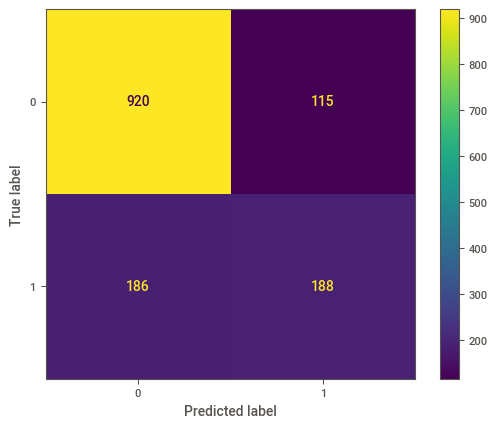

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

**ROC and AUC for Random Forest:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

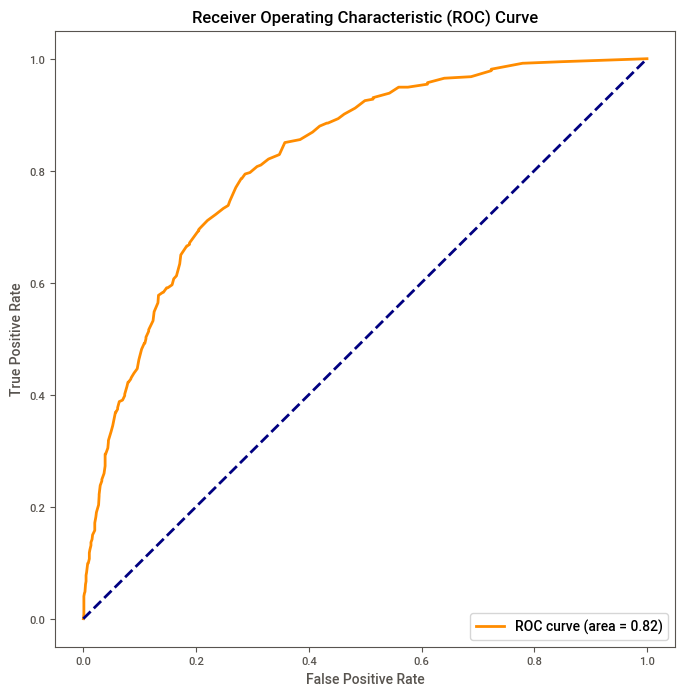

In [73]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Rerunning Random Forest by Tuning hypermaters  

To use the Random Forest model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

Here, we used RandomizedSearchCV. There are other methods as well like GridSearchCV. Compared to GridSearchCV, which exhaustively searches through all possible combinations in the specified grid, RandomizedSearchCV randomly selects a subset of hyperparameter combinations to evaluate. This approach can significantly reduce the computational cost while still allowing for an effective search through the hyperparameter space.

In [74]:
param_dist={'n_estimators':randint(50,300),'max_depth':randint(1,20)}
rand_search=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_dist,n_iter=5,cv=5)
rand_search.fit(X_train,y_train)
best_rf=rand_search.best_estimator_
print('Best Hyperparameters:', rand_search.best_params_)

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 287}


**Model performance metrics for Random Forest with tuned hyperparameters:**

We then evaluated the Random Forest model's performance using common metrics - Accuracy, Precision, Recall and F1 Score



In [75]:
rf_tuned=best_rf.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, rf_tuned)
precision_rf_tuned = precision_score(y_test, rf_tuned)
recall_rf_tuned = recall_score(y_test, rf_tuned)
f1_rf_tuned = f1_score(y_test, rf_tuned)

# Print the metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf_tuned:.2f}")
print(f"Precision: {precision_rf_tuned:.2f}")
print(f"Recall: {recall_rf_tuned:.2f}")
print(f"F1 Score: {f1_rf_tuned:.2f}")

Random Forest Model Performance:
Accuracy: 0.81
Precision: 0.68
Recall: 0.52
F1 Score: 0.59


**Classification Report for Random Forest with tuned hyperparameters:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (rf_tuned) obtained from the Random Forest model

In [76]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_tuned))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Confusion Matrix Visualization for Random Forest with tuned hyperparameters:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (rf_tuned) obtained from the Random Forest model and visualizes the confusion matrix using a heatmap.

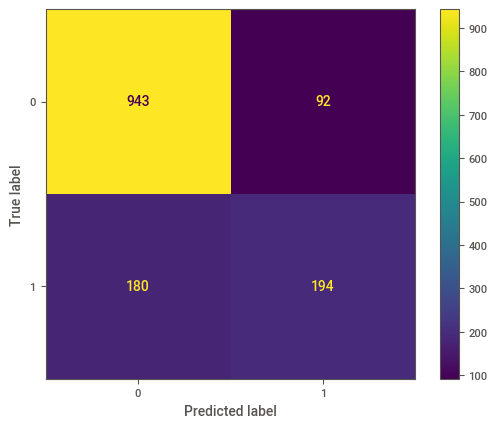

In [77]:
conf_matrix = confusion_matrix(y_test, rf_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

**ROC and AUC for Random Forest with tuned hyperparameters:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

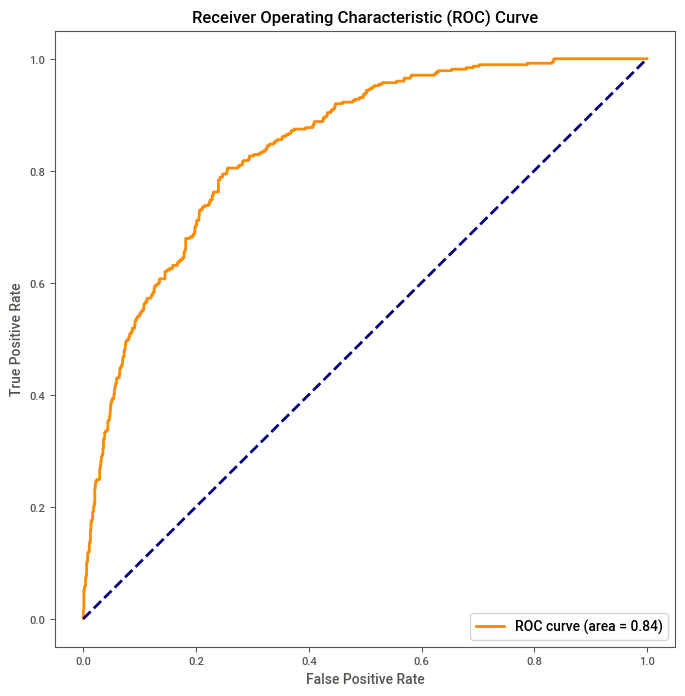

In [78]:
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, rand_search.predict_proba(X_test)[:,1])
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf_tuned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 6. XGBoost Algorithm(XGB)

XGBoost is an optimized gradient boosting algorithm that builds a series of decision trees, aiming to correct errors of the previous models, known for its speed, performance, and regularization techniques.

To use the XGBoost model, we started by instantiating it. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.

In [79]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

**Model performance metrics for XGBoost:**

We then evaluated the XGBoost model's performance using common metrics - Accuracy, Precision, Recall and F1 Score



In [80]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGB Model Performance:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")

XGB Model Performance:
Accuracy: 0.79
Precision: 0.61
Recall: 0.55
F1 Score: 0.58


**Classification Report for XGBoost:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_pred_xgb) obtained from the XGBoost model


In [81]:
print("XGBoost Classification Report")
print(classification_report(y_test,y_pred_xgb))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



**Confusion Matrix Visualization for XGBoost:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred_xgb) obtained from the XGBoost model and visualizes the confusion matrix using a heatmap.

XGBoost Confusion Matrix


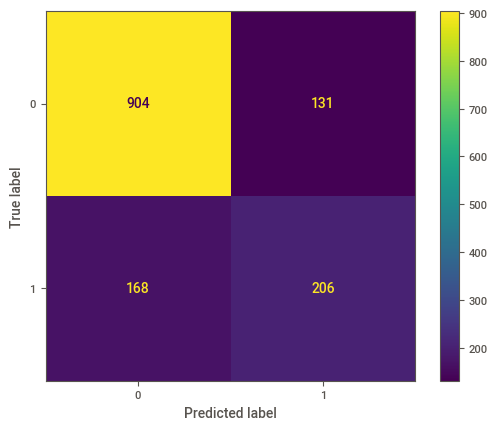

In [82]:
print("XGBoost Confusion Matrix")
xgb_confusion_matrix=confusion_matrix(y_test,y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix).plot()

**ROC and AUC for XGBoost:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

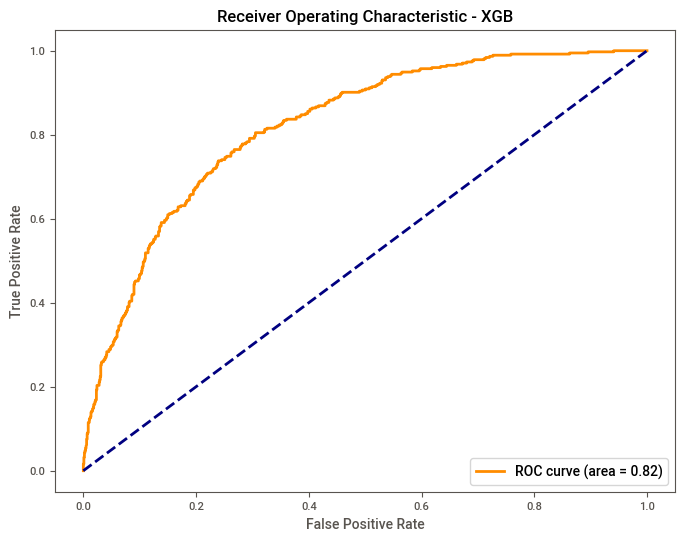

In [83]:
y_pred_xgb_prb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGB')
plt.legend(loc="lower right")
plt.show()




# Rerunning XGBoost by Tuning hypermaters  

We used GridSearchCV to perform an exhaustive search over the specified hyperparameter grid for an XGBoost classifier, aiming to find the combination of hyperparameters that maximizes accuracy through cross-validation on the training data.
After identifying the Best Hyperparameters, trained the XGBoost Classifier with Best Parameters and made predictions.

In [84]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

To use the XGBoost model, we started by instantiating it with best params obtained. Once the model is instantiated, the next step is to train it using the training data. After the model is trained, predictions can be made on test date.


In [85]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train XGBoost with the best hyperparameters
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred_xgb_tuned = best_xgb_classifier.predict(X_test)

**Model performance metrics for XGBoost with tuned hyperparameters:**

We then evaluated the XGBoost model's performance using common metrics - Accuracy, Precision, Recall and F1 Score


In [86]:
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned)

print("XGB Model Performance:")
print(f"Accuracy: {accuracy_xgb_tuned:.2f}")
print(f"Precision: {precision_xgb_tuned:.2f}")
print(f"Recall: {recall_xgb_tuned:.2f}")
print(f"F1 Score: {f1_xgb_tuned:.2f}")

XGB Model Performance:
Accuracy: 0.81
Precision: 0.68
Recall: 0.50
F1 Score: 0.58


**Classification Report for XGBoost with tuned hyperparameters:**

We generated and displayed a comprehensive classification report based on the true labels (y_test) and the predicted labels (y_pred_xgb_tuned) obtained from the XGBoost model


In [87]:
print('Tuned XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb_tuned))


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.50      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409



**Confusion Matrix Visualization for XGBoost with tuned hyperparameters:**

We generated a confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred_xgb_tuned) obtained from the XGBoost model and visualizes the confusion matrix using a heatmap.

Tuned XGBoost Confusion Matrix:


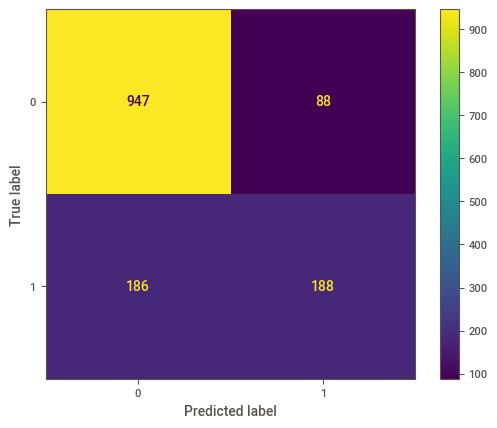

In [88]:
print("Tuned XGBoost Confusion Matrix:")
tuned_xgb_conf_matrix=confusion_matrix(y_test, y_pred_xgb_tuned)
ConfusionMatrixDisplay(confusion_matrix=tuned_xgb_conf_matrix).plot()

**ROC and AUC for XGBoost with tuned hyperparameters:**

We used matplotlib to create a plot of the ROC curve and to get the AUC value

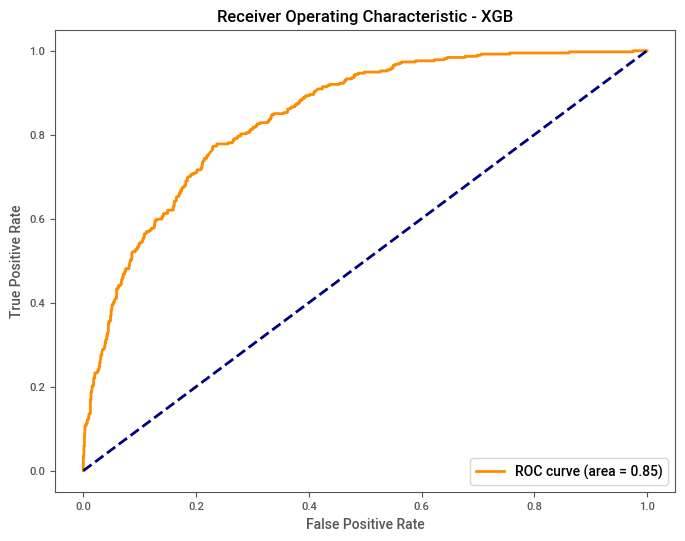

In [89]:
y_pred_prob_xgb_tuned = best_xgb_classifier.predict_proba(X_test)[:, 1]
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_pred_prob_xgb_tuned)
roc_auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb_tuned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGB')
plt.legend(loc="lower right")
plt.show()



 # Analysis